In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import pandas as pd
import scipy.stats as st

'''All colours
{"PDB_SCATTER": "#006374",
                   "2D_SIM_SCATTER": "#006374",
                   "3D_SIM_SCATTER": "#fbafe4",
                   "ALPHA_SCATTER": "#1ac938",
                   "THEORY": "#006374",
                   "CL": "#fbafe4",
                   "RESIDUALS": "#fbafe4",
                   "DATABANK": "#006374",
                   "USED": "#fbafe4",
                   "CONTACT": "#fbafe4",
                   "NO_CONTACT": "#006374"}
'''

In [14]:
# Let's set a custom pallette
colors = ["#682860", "#286830", "#fbafe4", '#006374']
sns.set(context="notebook", style='ticks', font_scale=1.8, font='Helvetica')
sns.set_palette(sns.color_palette(colors))

In [20]:
def return_df_for_plotting(alphafold, rsbc)-> pd.DataFrame:
    df = alphafold[["alpha","beta"]]
    df["Type"] = len(df)*['alpha fold']
    rsbc["Type"] = len(rsbc)*["PDB"]
    df1 = rsbc[["H", "Type"]]
    df1['beta'] = rsbc['B'].fillna(0)+rsbc['E'].fillna(0)
    df1 = df1.loc[:, ["H","beta","Type"]]
    whole_df = df1.append(df, ignore_index=True)
    return df, df1, whole_df

In [28]:
def contour_cloud(x, y, c, alpha, cmap=None):
    xmin, xmax = 0, 1
    ymin, ymax = 0, 1

    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    CS = plt.contour(xx, yy, f, colors=c, linewidthw=2, alpha=alpha)
    return CS

In [29]:
alphafold

,Unnamed: 0,Unnamed: 0.1,filename,mean,std,alpha,beta,protein_name
0,0,0,/home/jguven/Projects/sequence_distance_distri...,92.019633,8.351987,0.288889,0.285714,MYCOTHIOL ACETYLTRANSFERASE
1,1,1,/home/jguven/Projects/sequence_distance_distri...,92.592127,9.336789,0.327815,0.135762,LIPOYL SYNTHASE (Q04T63)
2,2,2,/home/jguven/Projects/sequence_distance_distri...,96.615255,3.005239,0.247557,0.299674,RIBONUCLEASE Z (Q818V3)
3,3,3,/home/jguven/Projects/sequence_distance_distri...,96.871468,3.243266,0.251613,0.293548,METHIONYL-TRNA
4,4,4,/home/jguven/Projects/sequence_distance_distri...,94.133622,12.520911,0.088136,0.372881,PROBABLE XYLOGLUCAN
...,...,...,...,...,...,...,...,...
6226,21777,21777,/home/jguven/Projects/sequence_distance_distri...,90.579924,14.472750,0.203883,0.375405,NAD KINASE (A6WL02)
6227,21779,21779,/home/jguven/Projects/sequence_distance_distri...,93.736001,7.933978,0.738562,0.006536,HEME A SYNTHASE (P12946)
6228,21791,21791,/home/jguven/Projects/sequence_distance_distri...,90.206949,11.905410,0.180602,0.381271,NAD KINASE (A1VCX9)
6229,21800,21800,/home/jguven/Projects/sequence_distance_distri...,95.443479,5.874040,0.442509,0.139373,SHORT-CHAIN DEHYDROGENASE VIRD


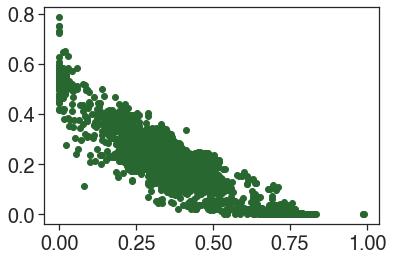

In [30]:
plt.scatter(df_af['alpha'],df_af['beta'], c='#286830',alpha=1)

<ipython-input-20-a8a4eb5928b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Type"] = len(df)*['alpha fold']
<ipython-input-20-a8a4eb5928b5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['beta'] = rsbc['B'].fillna(0)+rsbc['E'].fillna(0)
<ipython-input-28-6e6f4a5e3125>:10: UserWarning: The following kwargs were not used by contour: 'linewidthw'
  CS = plt.contour(xx, yy, f, colors=c, linewidthw=2, alpha=alpha)


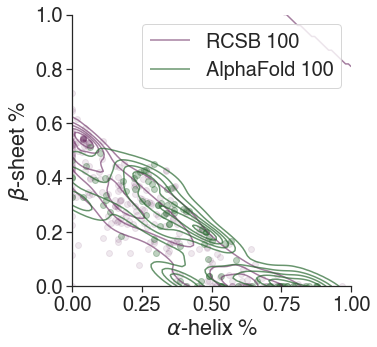

In [36]:
alphafold = pd.read_csv(f"unique_secondary_structures_100.csv")
rsbc = pd.read_csv(f"data/structures_100_raw.csv")
df_af, df_pdb, whole = return_df_for_plotting(alphafold, rsbc)
df_pdb = df_pdb.fillna(0)
plt.scatter(x=df_pdb['H'][::50], y=df_pdb['beta'][::50], color=colors[0],alpha=0.1)
plt.scatter(x=alphafold['alpha'][::50], y=alphafold['beta'][::50], color=colors[1],alpha=0.3)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((5,5))
cs1 = contour_cloud(x=df_pdb['H'], y=df_pdb['beta'], c=colors[0], alpha=0.6)
cs2 = contour_cloud(x=alphafold['alpha'], y=alphafold['beta'], c= colors[1], alpha=0.7)

cs1.collections[0].set_label('RCSB 100')
cs2.collections[0].set_label('AlphaFold 100')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel(r"$\alpha$-helix %")
ax.set_ylabel(r"$\beta$-sheet %")
ax.legend()
sns.despine()

<ipython-input-20-a8a4eb5928b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Type"] = len(df)*['alpha fold']
<ipython-input-20-a8a4eb5928b5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['beta'] = rsbc['B'].fillna(0)+rsbc['E'].fillna(0)
<ipython-input-28-6e6f4a5e3125>:10: UserWarning: The following kwargs were not used by contour: 'linewidthw'
  CS = plt.contour(xx, yy, f, colors=c, linewidthw=2, alpha=alpha)


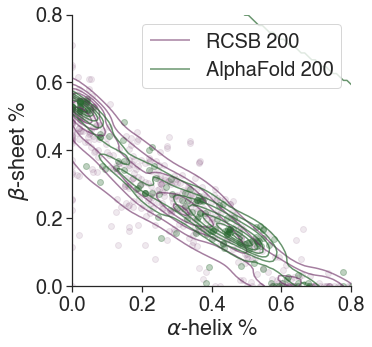

In [38]:
alphafold = pd.read_csv(f"unique_secondary_structures_200.csv")
rsbc = pd.read_csv(f"data/structures_200_raw.csv")
df_af, df_pdb, whole = return_df_for_plotting(alphafold, rsbc)
df_pdb = df_pdb.fillna(0)
plt.scatter(x=df_pdb['H'][::50], y=df_pdb['beta'][::50], color=colors[0],alpha=0.1)
plt.scatter(x=alphafold['alpha'][::50], y=alphafold['beta'][::50], color=colors[1],alpha=0.3)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((5,5))
cs1 = contour_cloud(x=df_pdb['H'], y=df_pdb['beta'], c=colors[0], alpha=0.6)
cs2 = contour_cloud(x=alphafold['alpha'], y=alphafold['beta'], c= colors[1], alpha=0.7)

cs1.collections[0].set_label('RCSB 200')
cs2.collections[0].set_label('AlphaFold 200')
ax.set_xlim(0,0.8)
ax.set_ylim(0,0.8)
ax.set_xlabel(r"$\alpha$-helix %")
ax.set_ylabel(r"$\beta$-sheet %")
ax.legend()
sns.despine()

<ipython-input-20-a8a4eb5928b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Type"] = len(df)*['alpha fold']
<ipython-input-20-a8a4eb5928b5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['beta'] = rsbc['B'].fillna(0)+rsbc['E'].fillna(0)
<ipython-input-28-6e6f4a5e3125>:10: UserWarning: The following kwargs were not used by contour: 'linewidthw'
  CS = plt.contour(xx, yy, f, colors=c, linewidthw=2, alpha=alpha)


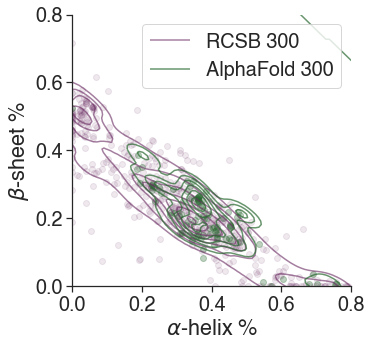

In [44]:
alphafold = pd.read_csv(f"unique_secondary_structures_300.csv")
rsbc = pd.read_csv(f"data/structures_300_raw.csv")
df_af, df_pdb, whole = return_df_for_plotting(alphafold, rsbc)
df_pdb = df_pdb.fillna(0)
plt.scatter(x=df_pdb['H'][::70], y=df_pdb['beta'][::70], color=colors[0],alpha=0.1)
plt.scatter(x=alphafold['alpha'][::70], y=alphafold['beta'][::70], color=colors[1],alpha=0.3)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((5,5))
cs1 = contour_cloud(x=df_pdb['H'], y=df_pdb['beta'], c=colors[0], alpha=0.6)
cs2 = contour_cloud(x=alphafold['alpha'], y=alphafold['beta'], c= colors[1], alpha=0.7)

cs1.collections[0].set_label('RCSB 300')
cs2.collections[0].set_label('AlphaFold 300')
ax.set_xlim(0,0.8)
ax.set_ylim(0,0.8)
ax.set_xlabel(r"$\alpha$-helix %")
ax.set_ylabel(r"$\beta$-sheet %")
ax.legend()
sns.despine()